In [89]:
import ROOT
%run ./toolkit/dilution_tools.ipynb

In [90]:
rootdir="/volatile/clas12/users/gmat/clas12analysis.sidis.data/rgc/sidisdvcs/test8.3.2/"

In [91]:
df_out = extract_dilution_factors(rootdir=rootdir,
                                  cookType="TBT",
                                  ft="Off",
                                  debug=False)

NH3 fcupgated calculated
ND3 fcupgated calculated
C fcupgated calculated
CH fcupgated calculated
MT fcupgated calculated
NH3 Runs: [16983, 16990, 16992, 17001, 17015, 17019, 17076, 17088, 17092]
ND3 Runs: [16889, 16911, 16912, 16913, 16922]
C Runs: [16874, 16877, 17138]
CH Runs: [17118]
MT Runs: [16979]


In [92]:
df_out

,xmin,xmax,Q2min,Q2max,df_NH3,df_ND3,N_NH3,N_ND3,N_C,N_CH,N_MT,N_F,fcupgated_NH3,fcupgated_ND3,fcupgated_C,fcupgated_CH,fcupgated_MT,fcupgated_F,n_NH3,n_ND3,n_C,n_CH,n_MT,n_F,cookType
0,0.10,0.15,1.0969,1.3094,0.193626,0.194120,473039.0,322088.0,187264.0,56069.0,522.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,0.722730,0.842995,0.851493,0.864995,0.008128,0,TBT
1,0.10,0.15,1.3094,1.5632,0.182605,0.183106,2722725.0,1904970.0,1079519.0,319678.0,2916.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,4.159902,4.985845,4.908593,4.931780,0.045404,0,TBT
2,0.10,0.15,1.5632,1.8661,0.177046,0.177523,3588454.0,2506628.0,1435167.0,422678.0,3801.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,5.482602,6.560554,6.525730,6.520796,0.059184,0,TBT
3,0.10,0.15,1.8661,2.2277,0.167498,0.167941,1882964.0,1310071.0,758739.0,221384.0,1982.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,2.876878,3.428826,3.450000,3.415366,0.030861,0,TBT
4,0.10,0.15,2.2277,2.6594,0.155903,0.156317,95440.0,66413.0,39259.0,11328.0,101.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,0.145818,0.173822,0.178511,0.174761,0.001573,0,TBT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.65,0.70,6.4475,7.6969,0.220725,0.221226,8755.0,5730.0,3226.0,993.0,10.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,0.013376,0.014997,0.014669,0.015319,0.000156,0,TBT
71,0.65,0.70,7.6969,9.1884,0.216722,0.217163,14800.0,9489.0,5666.0,1737.0,17.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,0.022612,0.024835,0.025763,0.026797,0.000265,0,TBT
72,0.65,0.70,9.1884,10.9689,0.232724,0.233092,6882.0,4317.0,2607.0,813.0,7.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,0.010515,0.011299,0.011854,0.012542,0.000109,0,TBT
73,0.70,0.75,7.6969,9.1884,0.241621,0.242911,1141.0,711.0,430.0,135.0,4.0,0,654516.550855,382075.676766,219924.345672,64819.997838,64223.766528,0,0.001743,0.001861,0.001955,0.002083,0.000062,0,TBT


In [93]:
df_out.to_csv("/work/clas12/users/gmat/rgc_dilution_factor_v1.csv")

In [38]:
np.unique(df_out.Q2min)

array([1.0969, 1.3094, 1.5632, 1.8661, 2.2277, 2.6594, 3.1747, 3.7899,
       4.5243, 5.4009, 6.4475, 7.6969, 9.1884])

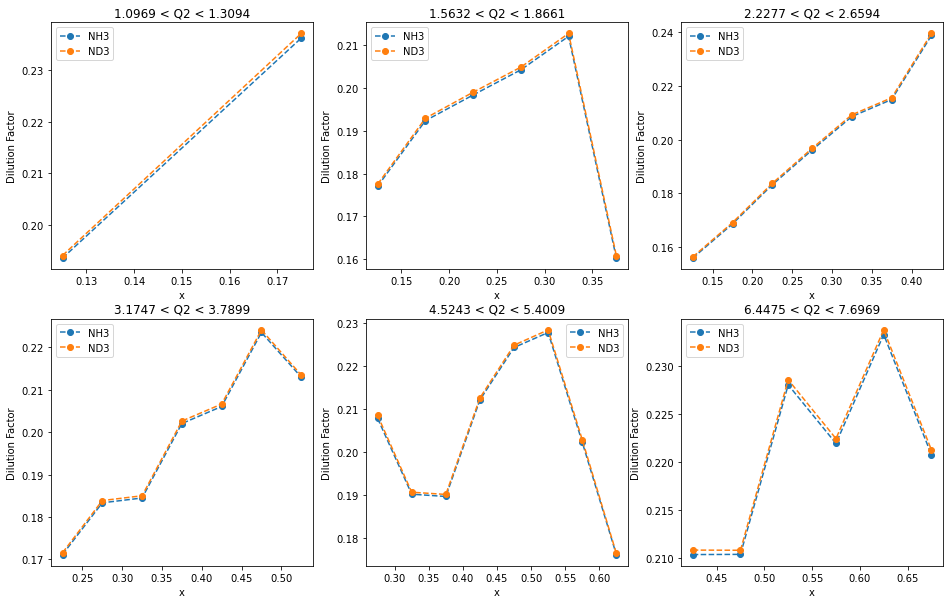

In [125]:
idx=7
df_tmp = df_out[df_out.Q2min==q2min]
fig,axs=plt.subplots(2,3,figsize=(16,10))
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out[df_out.Q2min==q2min]
    axs[r,c].plot((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_NH3,"o--",label="NH3",)
    axs[r,c].plot((df_tmp.xmin+df_tmp.xmax)/2,df_tmp.df_ND3,"o--",label="ND3")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Dilution Factor")
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max))
    axs[r,c].legend()

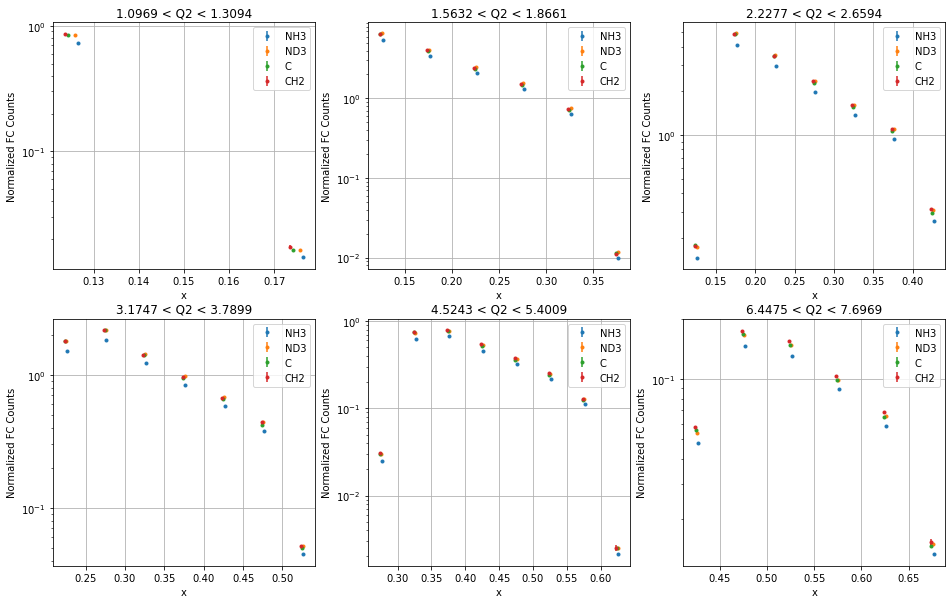

In [95]:
fig,axs=plt.subplots(2,3,figsize=(16,10))
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out[df_out.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.0015,df_tmp.n_NH3,yerr=np.sqrt(df_tmp.N_NH3)/df_tmp.fcupgated_NH3,fmt=".",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.00075,df_tmp.n_ND3,yerr=np.sqrt(df_tmp.N_ND3)/df_tmp.fcupgated_ND3,fmt=".",label="ND3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2-0.00075,df_tmp.n_C,yerr=np.sqrt(df_tmp.N_C)/df_tmp.fcupgated_C,fmt=".",label="C")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2-0.0015,df_tmp.n_CH,yerr=np.sqrt(df_tmp.N_CH)/df_tmp.fcupgated_CH,fmt=".",label="CH2")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Normalized FC Counts")
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max))
    axs[r,c].legend()
    axs[r,c].set_yscale("log")
    axs[r,c].grid()

In [96]:
df_out_debug = extract_dilution_factors(rootdir=rootdir,
                                  cookType="TBT",
                                  ft="Off",
                                  debug=True)

ND3 fcupgated calculated
C fcupgated calculated
CH fcupgated calculated
MT fcupgated calculated
NH3 Runs: [16983, 16990, 16992, 17001, 17015, 17019, 17076, 17088, 17092]
ND3 Runs: [16889, 16911, 16912, 16913, 16922]
C Runs: [16874, 16877, 17138]
CH Runs: [17118]
MT Runs: [16979]


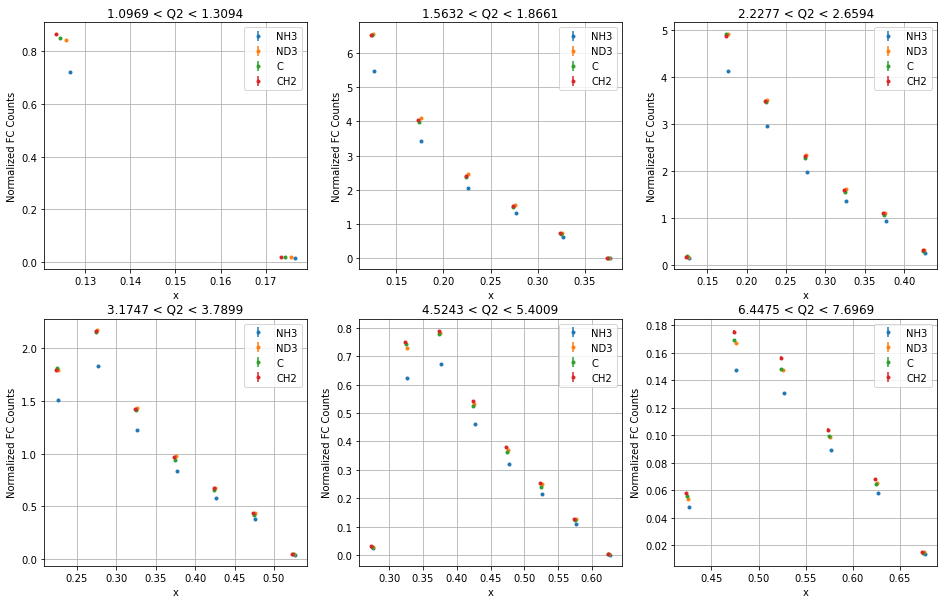

In [123]:
fig,axs=plt.subplots(2,3,figsize=(16,10))
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out[df_out.Q2min==q2min]
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.0015,df_tmp.n_NH3,yerr=np.sqrt(df_tmp.N_NH3)/df_tmp.fcupgated_NH3,fmt=".",label="NH3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2+0.00075,df_tmp.n_ND3,yerr=np.sqrt(df_tmp.N_ND3)/df_tmp.fcupgated_ND3,fmt=".",label="ND3")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2-0.00075,df_tmp.n_C,yerr=np.sqrt(df_tmp.N_C)/df_tmp.fcupgated_C,fmt=".",label="C")
    axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2-0.0015,df_tmp.n_CH,yerr=np.sqrt(df_tmp.N_CH)/df_tmp.fcupgated_CH,fmt=".",label="CH2")
    axs[r,c].set_xlabel("x")
    axs[r,c].set_ylabel("Normalized FC Counts")
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max))
    axs[r,c].legend()
    axs[r,c].grid()

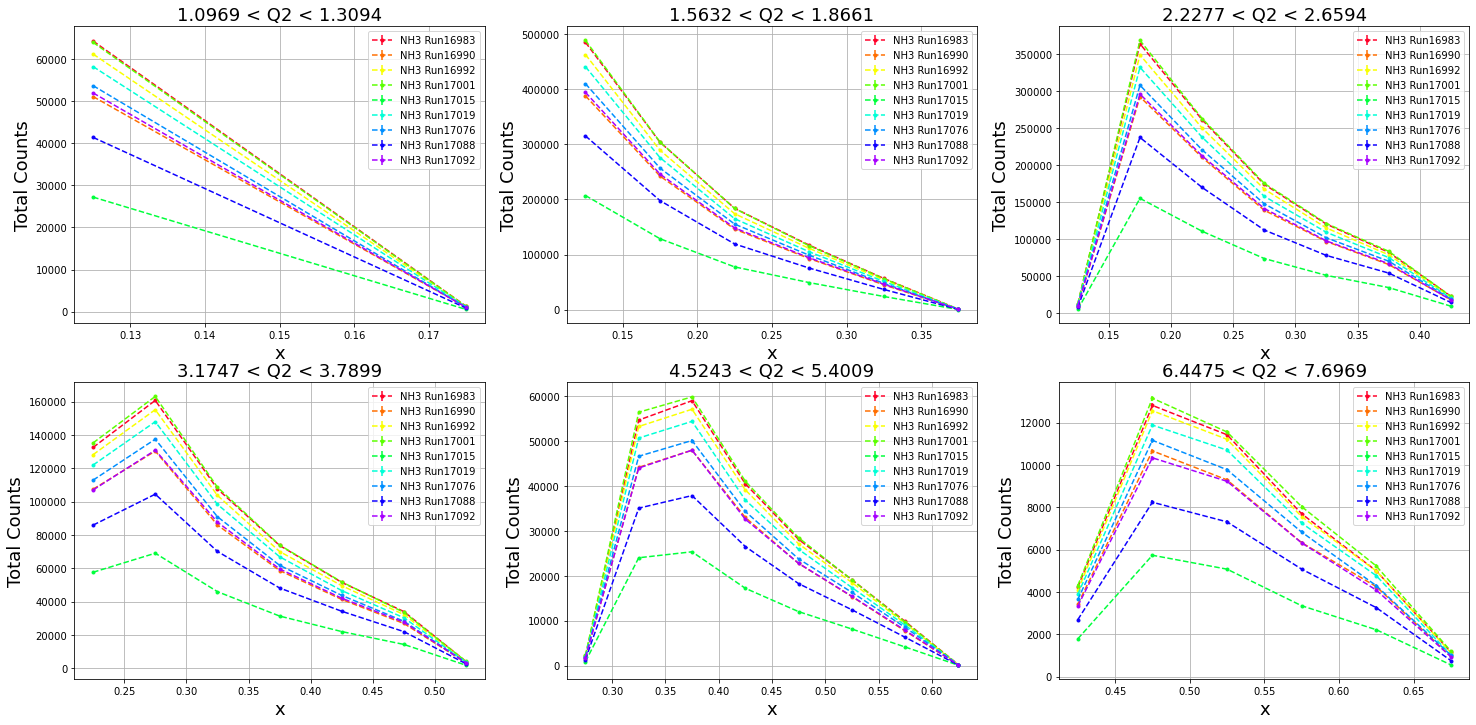

In [116]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["N_NH3_{}".format(irun)],yerr=np.sqrt(df_tmp["N_NH3_{}".format(irun)]),fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Total Counts",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

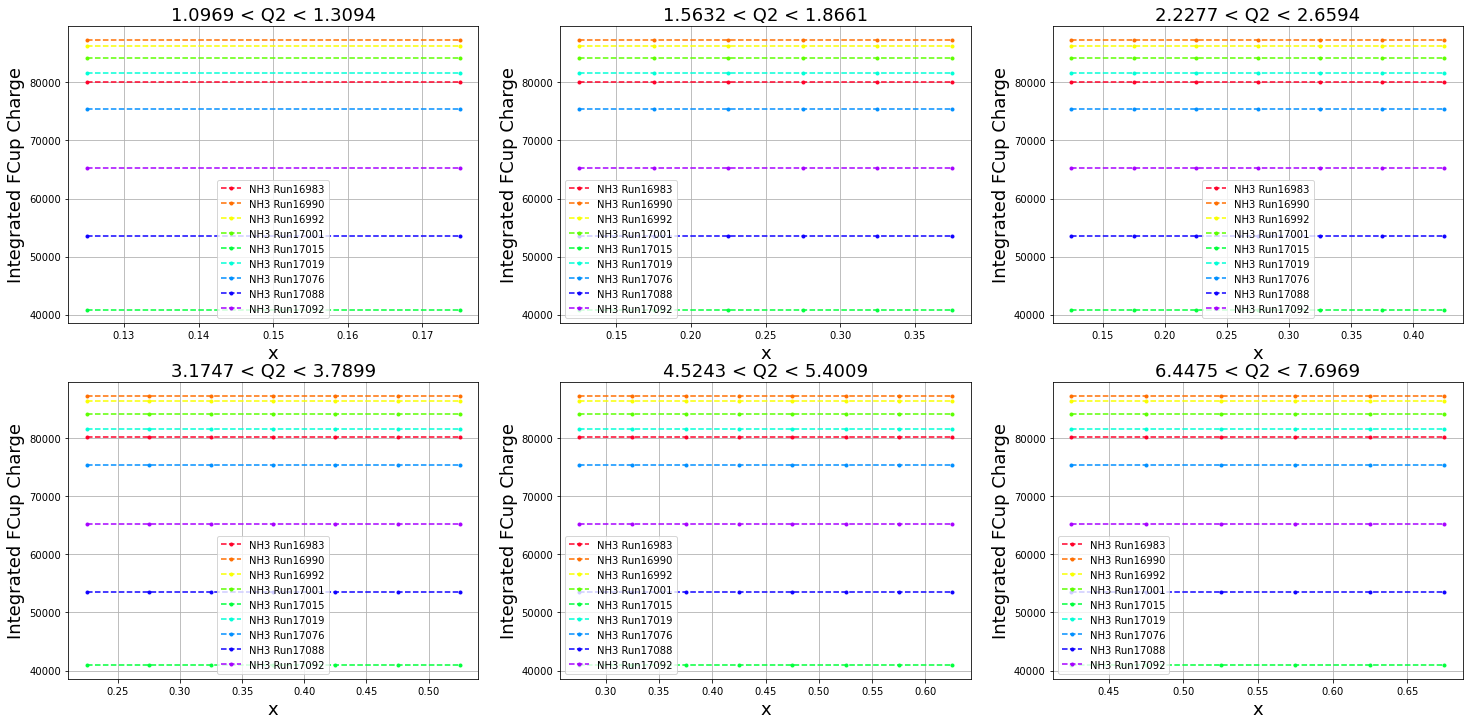

In [119]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["fcupgated_NH3_{}".format(irun)],fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Integrated FCup Charge",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

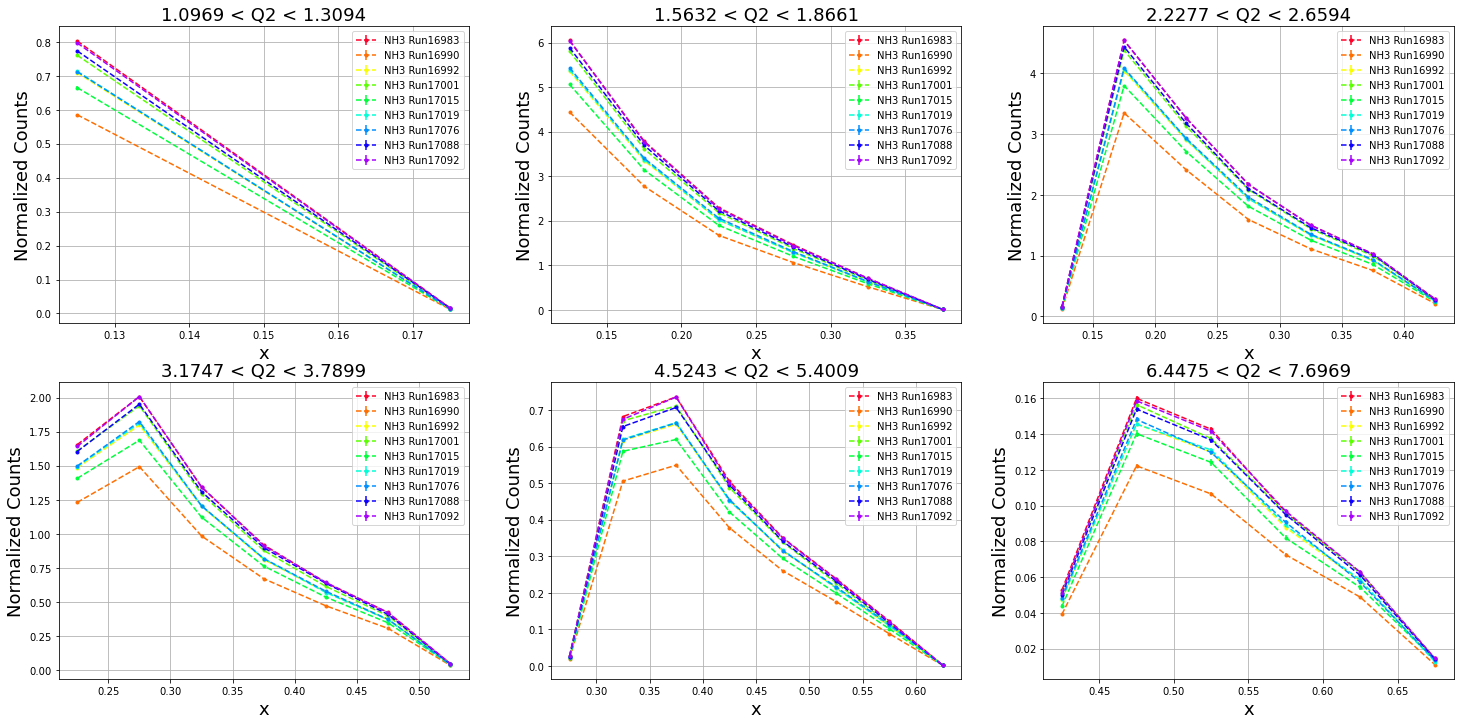

In [121]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["n_NH3_{}".format(irun)],yerr=np.sqrt(df_tmp["N_NH3_{}".format(irun)])/df_tmp["fcupgated_NH3_{}".format(irun)],fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Normalized Counts",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()

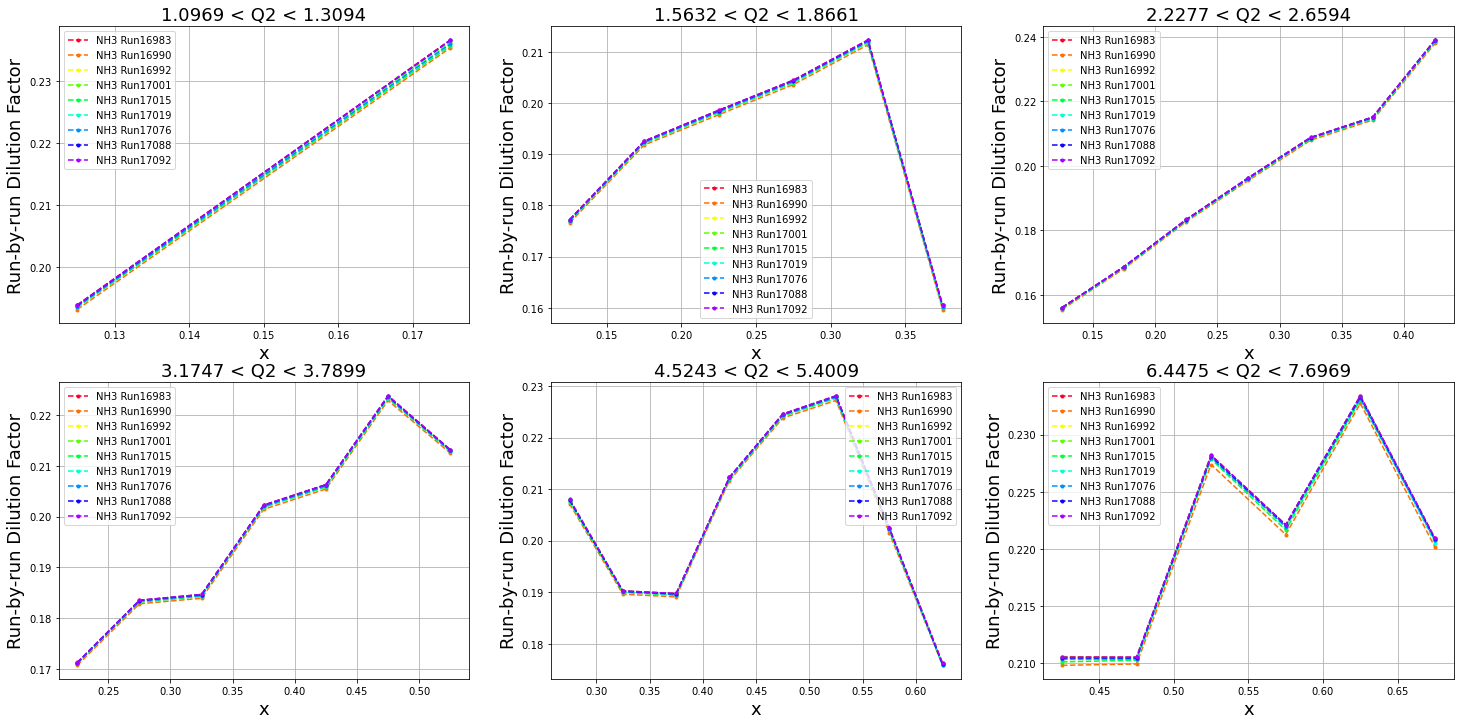

In [122]:
fig,axs=plt.subplots(2,3,figsize=(25,12))
NH3_runs = [16983,16990,16992,17001,17015,17019,17076,17088,17092]
cm = plt.get_cmap('gist_rainbow')
NUM_COLORS=len(NH3_runs)
for i,idx in enumerate([0,2,4,6,8,10]):
    r=int(np.floor(i/3))
    c=int(i%3)
    axs[r,c].set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
    q2min = np.unique(df_out.Q2min)[idx]
    q2max = np.unique(df_out.Q2max)[idx]
    df_tmp = df_out_debug[df_out.Q2min==q2min]
    for irun,run in enumerate(NH3_runs):
        axs[r,c].errorbar((df_tmp.xmin+df_tmp.xmax)/2,df_tmp["df_NH3_{}".format(irun)],fmt=".--",label="NH3 Run{}".format(run))
    axs[r,c].set_xlabel("x",fontsize=18)
    axs[r,c].set_ylabel("Run-by-run Dilution Factor",fontsize=18)
    axs[r,c].set_title("{} < Q2 < {}".format(q2min,q2max),fontsize=18)
    axs[r,c].legend()
    axs[r,c].grid()